In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [69]:
df = pd.read_csv("epa-sea-level.csv")

In [3]:
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


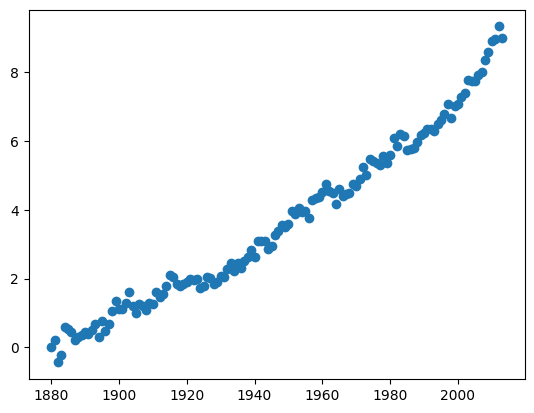

In [70]:
# Create scatter plot
fig, ax = plt.subplots()
ax.scatter(x=df["Year"], y=df["CSIRO Adjusted Sea Level"])

In [71]:
# Calculate first line of best fit
r = linregress(x=df["Year"], y=df["CSIRO Adjusted Sea Level"])

In [72]:
df["regress"] = (df["Year"] * r.slope) + r.intercept 

In [73]:
df=pd.concat([pd.DataFrame({"Year": [2050], "regress": [(2050*r.slope)+r.intercept]}), df]).sort_values("Year", ascending=True).reset_index().drop("index",axis=1)

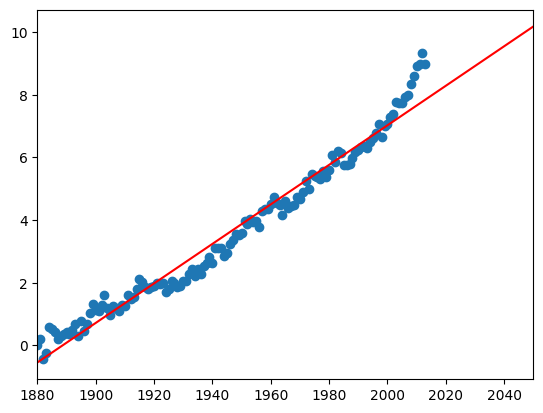

In [89]:
# Create scatter plot with first line of best fit
fig, ax = plt.subplots()
ax.scatter(x=df["Year"], y=df["CSIRO Adjusted Sea Level"])
ax.set_xlim([1880,2050])
ax.plot(df["Year"],df["regress"],'r')


In [82]:
# Calculate second line of best fit
df[(df["Year"] > 2000) & (df["Year"] < 2050)]["Year"]
r2 = linregress(x=df[(df["Year"] > 2000) & (df["Year"] < 2050)]["Year"], y=df[(df["Year"] > 2000) & (df["Year"] < 2050)]["CSIRO Adjusted Sea Level"])

In [91]:
df["regress2"]= (df[(df["Year"] > 2000)]["Year"] * r2.slope) + r2.intercept 

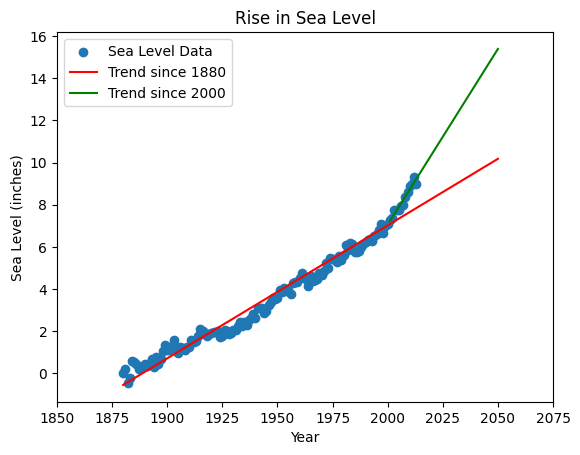

In [104]:
# Create scatter plot with first line of best fit
fig, ax = plt.subplots()
ax.scatter(x=df["Year"], y=df["CSIRO Adjusted Sea Level"])
ax.set_xlim([1850,2075])
ax.plot(df["Year"],df["regress"],'r')
ax.plot(df["Year"],df["regress2"],'g')
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.set_title("Rise in Sea Level")
ax.legend(["Sea Level Data", "Trend since 1880", "Trend since 2000"]) 
